In [3]:
import glob
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

from PIL import Image

In [5]:
def get_model(num_classes=2):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor =FastRCNNPredictor(in_features, num_classes)
    
    return model

In [6]:
from torchvision.transforms import ToTensor
transform = torchvision.transforms.Compose([ToTensor()])

In [9]:
device = 'cuda:0'

num_classes = 2
net3 = get_model(num_classes=num_classes)
head = 'saved_models/frcnn_head_epoch19.pth'
torch_dict_head = torch.load(head, map_location='cpu')
net3.load_state_dict(torch_dict_head)

net3.to(device)
net3.eval()
print('-------------')

-------------


In [10]:
impath = glob.glob("HollywoodHeads/JPEGImages/*.jpeg")

In [22]:
path = impath[10]

transform = torchvision.transforms.Compose([ToTensor()])

img = cv2.imread(path)
img, sketch = img[:,:1280,:], img[:,1280:,:]

img_tensor = transform(img)

with torch.no_grad():
    pred = net3([img_tensor.to(device)])

82 207 166 316
334 22 400 100


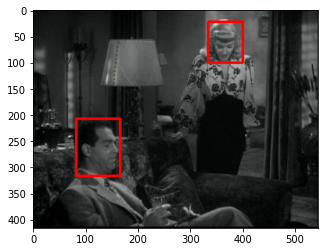

In [23]:
import numpy as np
import matplotlib.pyplot as plt

boxes = pred[0]['boxes'].cpu().numpy().astype(np.uint16)
confs = pred[0]['scores'].cpu().numpy().astype(np.float16)
draw_img = img.copy()

threshold = 0.5
for idx, box in enumerate(boxes):
    x1, y1, x2, y2 = box
    conf = confs[idx]
    if conf > threshold:
        cv2.rectangle(draw_img, (x1,y1),(x2,y2),(255,0,0), 3)
        print(x1,y1,x2,y2)
plt.imshow(draw_img)
plt.show()